<big><i>
All the Notebooks in this lecture series by **[Abdul Aziz MD](https://www.linkedin.com/in/abdul-aziz-md/)**
</i></big>

### Implement Breast Cancer Wisconsin (Diagnostic) using ANN Algorithm by TensorFlow 

### Objective:
The objective of applying an Artificial Neural Network (ANN) algorithm using TensorFlow on the Breast Cancer Wisconsin (Diagnostic) dataset is to create a predictive model that can accurately determine whether a breast tumor is malignant or benign based on various medical features derived from a digitized image of a fine needle aspirate (FNA) of a breast mass. The aim is to assist medical professionals in making accurate and timely diagnoses, ultimately improving patient outcomes.

### Breast Cancer Wisconsin (Diagnostic) Dataset:
The Breast Cancer Wisconsin (Diagnostic) dataset is a popular dataset used in machine learning and medical research. It consists of 569 samples of breast cancer cases, each with 30 features derived from a digitized image of a fine needle aspirate (FNA) of a breast mass. These features describe the characteristics of the cell nuclei present in the image. The dataset is divided into two classes: benign (non-cancerous) and malignant (cancerous).

Dataset link: https://www.kaggle.com/datasets/jeandedieunyandwi/breast-cancer-dataset-uci-ml

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Lab 30 breast-cancer-wisconsin.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
df["diagnosis"].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [7]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,NaN


In [8]:
df.sample(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
469,911366,B,11.62,18.18,76.38,408.8,0.11750,0.14830,0.102000,0.05564,...,25.40,88.14,528.1,0.17800,0.28780,0.31860,0.14160,0.2660,0.09270,NaN
392,903507,M,15.49,19.97,102.40,744.7,0.11600,0.15620,0.189100,0.09113,...,29.41,142.10,1359.0,0.16810,0.39130,0.55530,0.21210,0.3187,0.10190,NaN
153,87106,B,11.15,13.08,70.87,381.9,0.09754,0.05113,0.019820,0.01786,...,16.30,76.25,440.8,0.13410,0.08971,0.07116,0.05506,0.2859,0.06772,NaN
350,899187,B,11.66,17.07,73.70,421.0,0.07561,0.03630,0.008306,0.01162,...,19.74,83.61,542.5,0.09958,0.06476,0.03046,0.04262,0.2731,0.06825,NaN
407,905190,B,12.85,21.37,82.63,514.5,0.07551,0.08316,0.061260,0.01867,...,27.01,91.63,645.8,0.09402,0.19360,0.18380,0.05601,0.2488,0.08151,NaN


In [9]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [10]:
df.shape

(569, 33)

In [11]:
df.info()
# checking for null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [12]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
df.head()

In [13]:
df.loc[df['diagnosis']=='M', 'benign_0__mal_1'] = 1
df.loc[df['diagnosis']=='B', 'benign_0__mal_1'] = 0

In [14]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32,benign_0__mal_1
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN,1.0
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN,1.0
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN,1.0
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN,1.0
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN,1.0


In [15]:
df = df.drop(columns = ['id','Unnamed: 32','diagnosis'])

<Axes: xlabel='benign_0__mal_1', ylabel='count'>

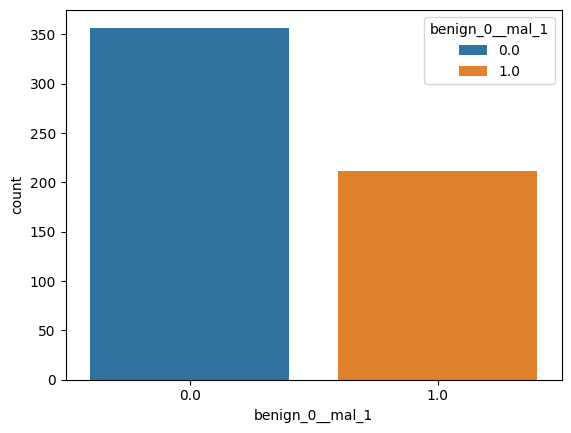

In [16]:
sns.countplot(x='benign_0__mal_1', data=df,hue="benign_0__mal_1")

In [ ]:
df['benign_0__mal_1'].value_counts()

<Axes: >

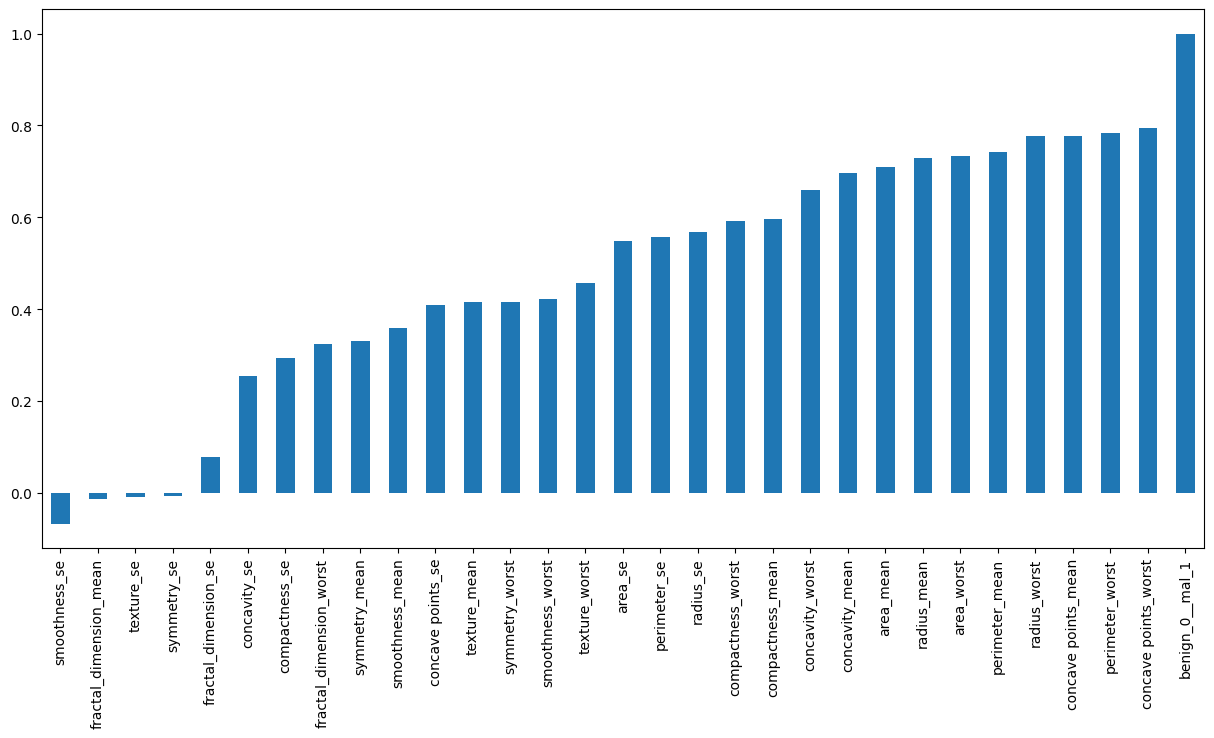

In [17]:
plt.figure(figsize=(15,7))
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

In [18]:
#Independent and Dependent Variables 

X = df.drop(['benign_0__mal_1'], axis=1).values
y = df['benign_0__mal_1'].values

In [19]:
# Train Test Split
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)

In [21]:
X_train.shape, X_test.shape

((455, 30), (114, 30))

In [22]:
# Scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [24]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [23]:
X_train_df = pd.DataFrame(X_train)
X_train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.341663,0.365911,0.335982,0.201442,0.331137,0.280412,0.118627,0.151988,0.225253,0.213353,...,0.303095,0.406183,0.307236,0.158106,0.291422,0.306206,0.200639,0.460137,0.191011,0.154401
1,0.246533,0.121069,0.243867,0.132471,0.487226,0.232225,0.066893,0.143241,0.414141,0.310657,...,0.192458,0.154318,0.204044,0.088478,0.472363,0.224321,0.079193,0.281340,0.375320,0.245113
2,0.294335,0.261075,0.278764,0.168865,0.176221,0.079320,0.101593,0.054920,0.215657,0.134583,...,0.213803,0.421109,0.188605,0.102438,0.257082,0.119830,0.183546,0.170790,0.236941,0.111111
3,0.385205,0.235712,0.380001,0.243097,0.326171,0.234648,0.176898,0.202734,0.269697,0.208509,...,0.350053,0.219083,0.335126,0.197675,0.514627,0.296698,0.265735,0.430241,0.364676,0.277843
4,0.364381,0.352384,0.352083,0.229480,0.415636,0.161401,0.173266,0.261382,0.265657,0.195029,...,0.396300,0.502665,0.363514,0.234172,0.496797,0.155048,0.232748,0.552921,0.288587,0.177883


In [26]:
df.shape

(569, 31)

In [25]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer,Dropout

In [27]:
# Creating the model
model1 = Sequential()
model1.add(InputLayer(input_shape=(30,)))  # Input layer with 26 input features
model1.add(Dense(26, activation='relu'))  # First hidden layer
model1.add(Dense(15, activation='relu'))  # Second hidden layer
model1.add(Dense(1, activation='sigmoid'))  # Output layer
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 26)                806       
                                                                 
 dense_1 (Dense)             (None, 15)                405       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 1227 (4.79 KB)
Trainable params: 1227 (4.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [28]:
model1.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [29]:
model1.fit(x=X_train, y=y_train, epochs=100, validation_data=(X_test,y_test))

Epoch 1/100
15/15 [==============================] - 1s 23ms/step - loss: 0.6694 - accuracy: 0.6923 - val_loss: 0.6393 - val_accuracy: 0.7632
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 0.6093 - accuracy: 0.8374 - val_loss: 0.5680 - val_accuracy: 0.8947
Epoch 3/100
15/15 [==============================] - 0s 6ms/step - loss: 0.5482 - accuracy: 0.8527 - val_loss: 0.5129 - val_accuracy: 0.8860
Epoch 4/100
15/15 [==============================] - 0s 6ms/step - loss: 0.4942 - accuracy: 0.8747 - val_loss: 0.4580 - val_accuracy: 0.8860
Epoch 5/100
15/15 [==============================] - 0s 7ms/step - loss: 0.4403 - accuracy: 0.8747 - val_loss: 0.4107 - val_accuracy: 0.8860
Epoch 6/100
15/15 [==============================] - 0s 6ms/step - loss: 0.3922 - accuracy: 0.8813 - val_loss: 0.3942 - val_accuracy: 0.8421
Epoch 7/100
15/15 [==============================] - 0s 6ms/step - loss: 0.3584 - accuracy: 0.8989 - val_loss: 0.3644 - val_accuracy: 0.8421
Epoch 8/100


In [30]:
model_loss = pd.DataFrame(model1.history.history)

<Axes: >

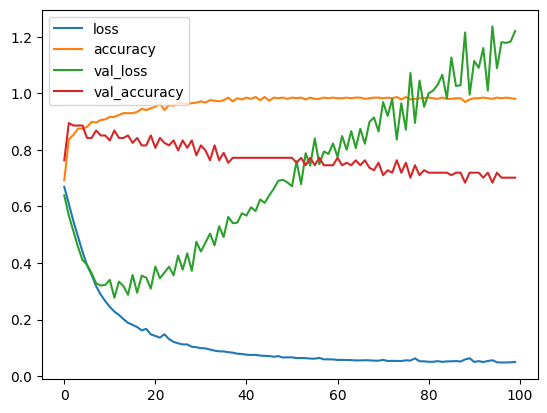

In [31]:
model_loss.plot()

In [35]:
# Early Stopping

model = Sequential()
model.add(InputLayer(input_shape=(30,)))  # Input layer with 26 input features
model.add(Dense(units=26,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [36]:
from tensorflow.keras.callbacks import EarlyStopping

In [37]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=50)

In [38]:
model.fit(x=X_train,
          y=y_train,
          epochs=100,
          validation_data=(X_test, y_test),
          callbacks=[early_stop]
          )#

Epoch 1/100
15/15 [==============================] - 1s 13ms/step - loss: 0.6736 - accuracy: 0.6527 - val_loss: 0.6506 - val_accuracy: 0.7018
Epoch 2/100
15/15 [==============================] - 0s 4ms/step - loss: 0.6370 - accuracy: 0.8176 - val_loss: 0.6125 - val_accuracy: 0.7895
Epoch 3/100
15/15 [==============================] - 0s 4ms/step - loss: 0.5992 - accuracy: 0.8505 - val_loss: 0.5721 - val_accuracy: 0.8158
Epoch 4/100
15/15 [==============================] - 0s 4ms/step - loss: 0.5544 - accuracy: 0.8527 - val_loss: 0.5243 - val_accuracy: 0.8158
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 0.4983 - accuracy: 0.8637 - val_loss: 0.4741 - val_accuracy: 0.8333
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 0.4373 - accuracy: 0.8901 - val_loss: 0.4190 - val_accuracy: 0.8596
Epoch 7/100
15/15 [==============================] - 0s 5ms/step - loss: 0.3769 - accuracy: 0.8901 - val_loss: 0.3834 - val_accuracy: 0.8421
Epoch 8/100


In [39]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=10)

In [40]:
model.fit(x=X_train,
          y=y_train,
          epochs=100,
          validation_data=(X_test, y_test),
          callbacks=[early_stop]
          )#

Epoch 1/100
15/15 [==============================] - 0s 7ms/step - loss: 0.0567 - accuracy: 0.9824 - val_loss: 0.8108 - val_accuracy: 0.7368
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0607 - accuracy: 0.9824 - val_loss: 0.8681 - val_accuracy: 0.7193
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0547 - accuracy: 0.9824 - val_loss: 0.9269 - val_accuracy: 0.7105
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0571 - accuracy: 0.9824 - val_loss: 0.7968 - val_accuracy: 0.7456
Epoch 5/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0532 - accuracy: 0.9868 - val_loss: 0.9882 - val_accuracy: 0.7105
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 0.0586 - accuracy: 0.9802 - val_loss: 0.8004 - val_accuracy: 0.7456
Epoch 7/100
15/15 [==============================] - 0s 4ms/step - loss: 0.0547 - accuracy: 0.9802 - val_loss: 0.9250 - val_accuracy: 0.7105
Epoch 8/100
1

<Axes: >

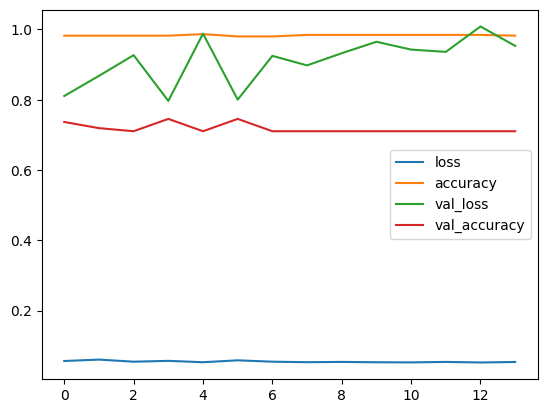

In [41]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [43]:
# Adding Dropout Layers

from tensorflow.keras.layers import Dropout

In [44]:
model = Sequential()
model.add(InputLayer(input_shape=(30,)))  # Explicitly adding input layer with 26 input features
model.add(Dense(26,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [45]:
model.fit(x=X_train,
          y=y_train,
          epochs=150,
          validation_data=(X_test, y_test),
          callbacks=[early_stop]
          )

Epoch 1/150
15/15 [==============================] - 1s 15ms/step - loss: 0.6927 - accuracy: 0.5516 - val_loss: 0.6843 - val_accuracy: 0.6316
Epoch 2/150
15/15 [==============================] - 0s 5ms/step - loss: 0.6764 - accuracy: 0.6264 - val_loss: 0.6738 - val_accuracy: 0.6491
Epoch 3/150
15/15 [==============================] - 0s 5ms/step - loss: 0.6715 - accuracy: 0.6352 - val_loss: 0.6595 - val_accuracy: 0.7544
Epoch 4/150
15/15 [==============================] - 0s 5ms/step - loss: 0.6558 - accuracy: 0.6857 - val_loss: 0.6410 - val_accuracy: 0.8246
Epoch 5/150
15/15 [==============================] - 0s 5ms/step - loss: 0.6499 - accuracy: 0.6681 - val_loss: 0.6217 - val_accuracy: 0.8509
Epoch 6/150
15/15 [==============================] - 0s 5ms/step - loss: 0.6207 - accuracy: 0.7385 - val_loss: 0.5997 - val_accuracy: 0.8772
Epoch 7/150
15/15 [==============================] - 0s 5ms/step - loss: 0.6115 - accuracy: 0.7319 - val_loss: 0.5775 - val_accuracy: 0.8772
Epoch 8/150


In [46]:
model_loss = pd.DataFrame(model.history.history)

<Axes: >

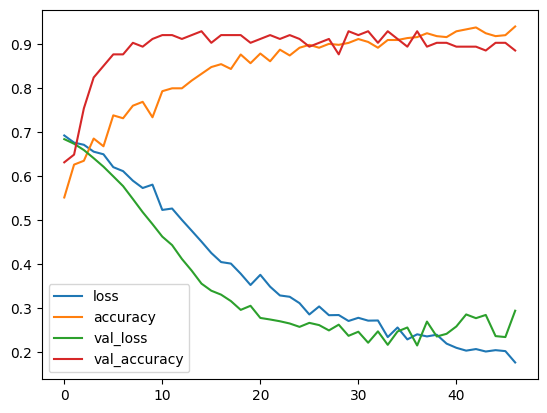

In [47]:
model_loss.plot()

In [48]:
score = model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 0.2940 - accuracy: 0.8860


In [49]:
print(model.metrics_names)
print(score)

['loss', 'accuracy']
[0.2939855754375458, 0.8859649300575256]


In [50]:
from keras.models import load_model
model.save('123model.keras')

# Using model for future predictions.

In [51]:
import tensorflow as tf
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import warnings

warnings.filterwarnings("ignore")

# Load the model
model = tf.keras.models.load_model('123model.keras')

# Example input data (replace with your own data)
# Ensure you include all 30 features expected by the model
input_data = {
    'radius_mean': [14.0],
    'texture_mean': [20.0],
    'perimeter_mean': [90.0],
    'area_mean': [600.0],
    'smoothness_mean': [0.1],
    'compactness_mean': [0.15],
    'concavity_mean': [0.2],
    'concave_points_mean': [0.1],
    'symmetry_mean': [0.2],
    'fractal_dimension_mean': [0.06],
    'radius_se': [0.2],
    'texture_se': [1.0],
    'perimeter_se': [1.5],
    'area_se': [20.0],
    'smoothness_se': [0.005],
    'compactness_se': [0.02],
    'concavity_se': [0.03],
    'concave_points_se': [0.01],
    'symmetry_se': [0.03],
    'fractal_dimension_se': [0.004],
    'radius_worst': [16.0],
    'texture_worst': [25.0],
    'perimeter_worst': [105.0],
    'area_worst': [800.0],
    'smoothness_worst': [0.12],
    'compactness_worst': [0.2],
    'concavity_worst': [0.3],
    'concave_points_worst': [0.15],
    'symmetry_worst': [0.25],
    'fractal_dimension_worst': [0.08]
}

# Convert to DataFrame
input_df = pd.DataFrame(input_data)

# Preprocess the input data (normalize, scale, etc.)
scaler = MinMaxScaler()
input_array = scaler.fit_transform(input_df)  # Directly use the transformed array

# Make predictions
predictions = model.predict(input_array)

# For binary classification, convert probabilities to class labels
predicted_classes = (predictions > 0.5).astype("int32")  # Assuming a threshold of 0.5

# # Example mapping for binary classification
class_mapping = {0: 'Benign', 1: 'Malignant'}

# List comprehension to map predicted class labels to their corresponding names
predicted_class_names = []
for label in predicted_classes:
    predicted_class_names.append(class_mapping[label[0]])


print(predicted_class_names)


1/1 [==============================] - 0s 159ms/step
['Benign']


<center><h1> Happy Learning